In [ ]:
!pip install wordcloud
!pip install -U spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import random
import seaborn as sns
import nltk
data = pd.read_csv('fake_job_postings.csv')

In [ ]:
data.shape

(17880, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df = data.drop_duplicates()

In [ ]:
df.shape

(17880, 18)

In [ ]:
df.fillna('', inplace = True)

In [ ]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0
17878,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df['country'] = df['location'].str.split(',').str[0]

In [ ]:
country_dict = dict(df.country.value_counts()[:11])
del country_dict[''] #top 10 countries without null
country_dict

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127}

Text(0.5, 0, 'Country')

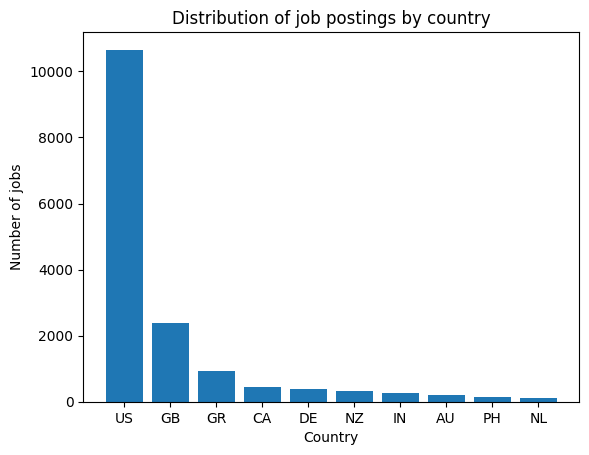

In [ ]:
plt.figure()
plt.title('Distribution of job postings by country')
plt.bar(country_dict.keys(), country_dict.values())
plt.ylabel('Number of jobs')
plt.xlabel('Country')

In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0,US
17878,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG


In [ ]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [ ]:
print(categorical)

['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country']


In [ ]:
print(numerical)

['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


<Axes: >

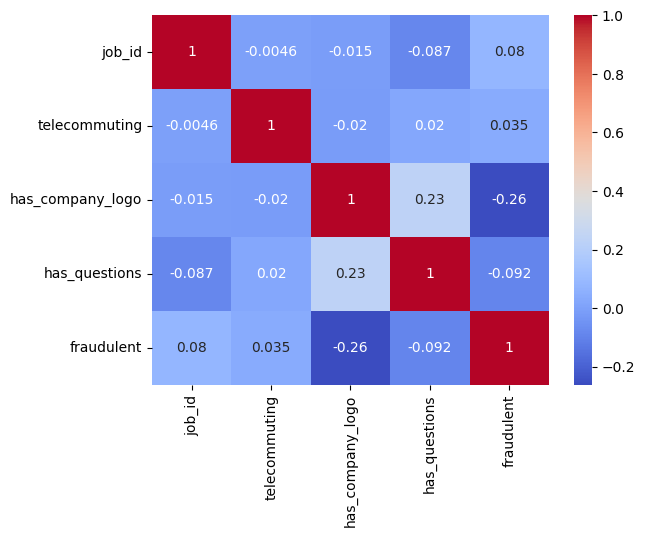

In [ ]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

In [ ]:
df.nunique()

job_id                 17880
title                  11231
location                3106
department              1338
salary_range             875
company_profile         1710
description            14802
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
country                   91
dtype: int64

In [ ]:
df['combined_text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' '+ df['salary_range'] + ' ' +df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

df.drop(columns=['title',
                 'location',
                 'department',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'telecommuting',
                 'has_company_logo',
                 'has_questions',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'country'], inplace=True)

In [ ]:
df

,job_id,fraudulent,combined_text
0,1,0,"Marketing Intern US, NY, New York Marketing W..."
1,2,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...,...
17875,17876,0,"Account Director - Distribution CA, ON, Toron..."
17876,17877,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,17878,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,0,"Graphic Designer NG, LA, Lagos Nemsia Studi..."


In [ ]:
del df['job_id']

In [ ]:
df

,fraudulent,combined_text
0,0,"Marketing Intern US, NY, New York Marketing W..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...
17875,0,"Account Director - Distribution CA, ON, Toron..."
17876,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,"Graphic Designer NG, LA, Lagos Nemsia Studi..."


In [ ]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

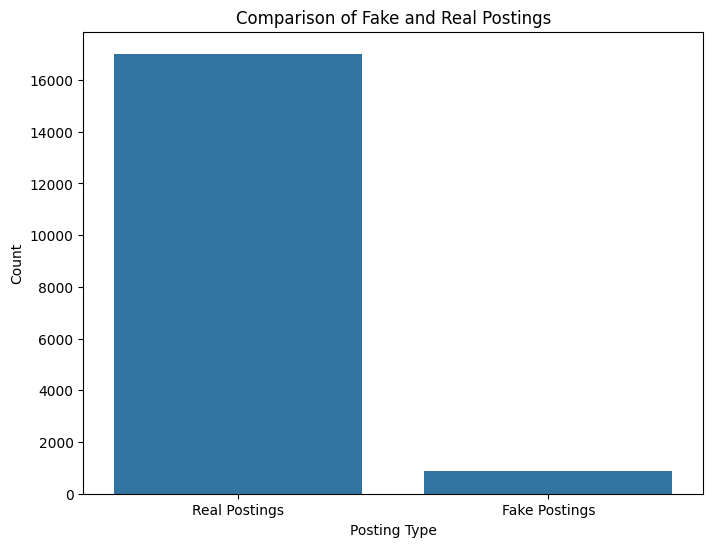

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.xlabel('Posting Type')
plt.ylabel('Count')
plt.title('Comparison of Fake and Real Postings')
plt.xticks([0, 1], ['Real Postings', 'Fake Postings'])
plt.show()

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from wordcloud import WordCloud
import spacy
import spacy.lang.en
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

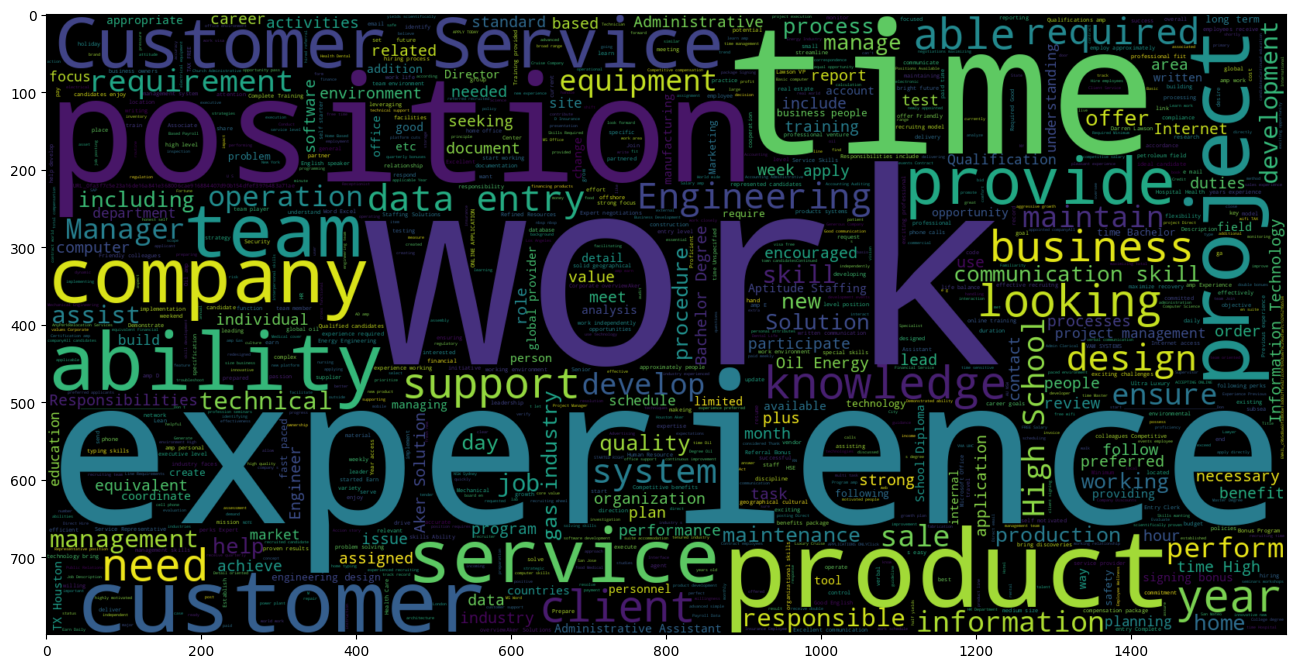

In [ ]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wordcloud = WordCloud(min_font_size=3,max_words=3000, width = 1600, height= 800, stopwords = STOPWORDS).generate(str(" ".join(fake)))
plt.imshow(wordcloud, interpolation = 'bilinear')

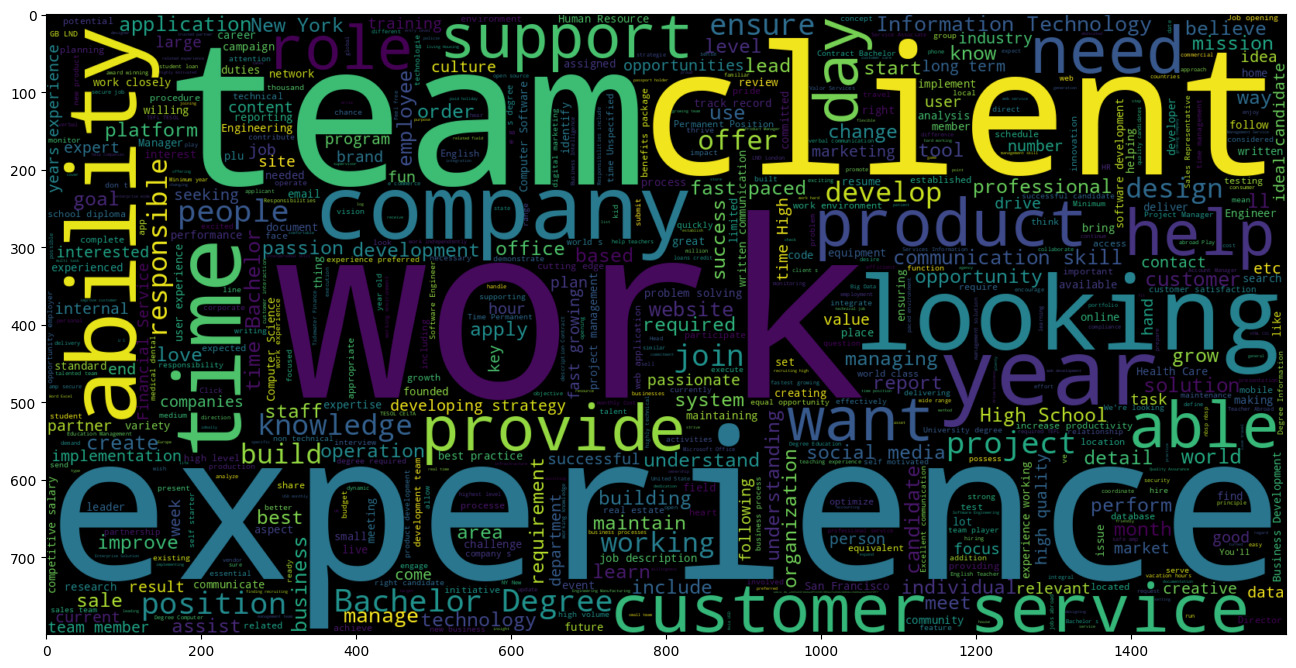

In [ ]:
plt.figure(figsize = (16,14))
wordcloud2 = WordCloud(min_font_size=3,max_words=3000, width = 1600, height= 800, stopwords = STOPWORDS).generate(str(" ".join(real)))
plt.imshow(wordcloud2, interpolation = 'bilinear')

In [ ]:
def process_text(input_text):
    lower_text = input_text.lower()
    stripped_text = re.sub(r'<.*?>', '', lower_text)
    no_url_text = re.sub(r'http\S+', '', stripped_text)
    alpha_numeric_text = re.sub(r'[^a-zA-Z0-9]', ' ', no_url_text)
    tokens = nltk.word_tokenize(alpha_numeric_text)
    stop_words_set = set(nltk.corpus.stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words_set]
    final_text = ' '.join(filtered_tokens)

    return final_text

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['combined_text']=df['combined_text'].apply(process_text)

In [ ]:
df

,fraudulent,combined_text
0,0,marketing intern us ny new york marketing food...
1,0,customer service cloud video production nz auc...
2,0,commissioning machinery assistant cma us ia we...
3,0,account executive washington dc us dc washingt...
4,0,bill review manager us fl fort worth spotsourc...
...,...,...
17875,0,account director distribution ca toronto sales...
17876,0,payroll accountant us pa philadelphia accounti...
17877,0,project cost control staff engineer cost contr...
17878,0,graphic designer ng la lagos nemsia studios lo...


In [ ]:
nlp_model = spacy.load("en_core_web_sm")

def lemmatize_text(input_text):
    doc = nlp_model(input_text)
    lemmatized_words = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [ ]:
df['combined_text']=df['combined_text'].apply(lemmatize_text)

In [ ]:
df

,fraudulent,combined_text
0,0,market intern we ny new york marketing food52 ...
1,0,customer service cloud video production nz auc...
2,0,commission machinery assistant cma us ia wever...
3,0,account executive washington dc us dc washingt...
4,0,bill review manager we fl fort worth spotsourc...
...,...,...
17875,0,account director distribution ca toronto sale ...
17876,0,payroll accountant we pa philadelphia accounti...
17877,0,project cost control staff engineer cost contr...
17878,0,graphic designer ng la lagos nemsia studio loo...


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from scipy.sparse import hstack
import pickle

In [ ]:
text_columns = ['combined_text']

df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [ ]:
X=combined_matrix_train
y=df['fraudulent'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

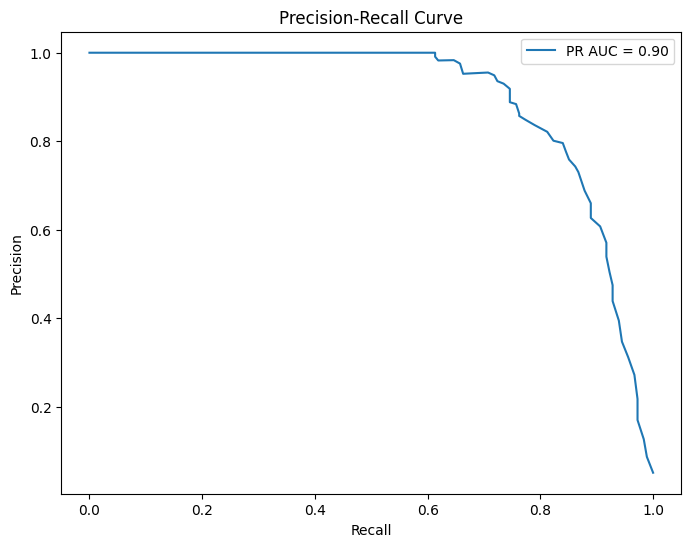

('              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      3395\n           1       0.99      0.61      0.76       181\n\n    accuracy                           0.98      3576\n   macro avg       0.99      0.81      0.87      3576\nweighted avg       0.98      0.98      0.98      3576\n',
 array([[3394,    1],
        [  70,  111]]),
 0.9775116152287652,
 0.895325136361943)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

class_weights = {0: 1, 1: 30}
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the classes and probabilities on the test data
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model using various metrics
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

report, conf_matrix, roc_auc, pr_auc
